# <center> AIM 5001 M8 Assignment (100 Points) <center>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/shenghanyueh/AIM-5001/main/M8/diamonds.csv').iloc[:,1:]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


## Part 1: Data Summary (5 Points)

In [3]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} attributes in the data set')

There are 53940 rows and 10 attributes in the data set


In [4]:
df.dtypes

carat      float64
cut         object
color       object
clarity     object
depth      float64
table      float64
price        int64
x          float64
y          float64
z          float64
dtype: object

__There are 53940 of rows with 10 attributes in the data set. The attributes and the data types are as the following:__
* carat : weight of the diamond, discrete numerical data

* cut : quality of the cut, ordinal categorical data

* color : diamond colour, ordinal categorical data

* clarity : a measurement of how clear the diamond is, ordinal categorical data

* depth : total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79), continuous numerical data

* table : width of top of diamond relative to widest point : continuous numerical data

* price : in US dollars, discrete numerical data

* x : length in mm : discrete numerical data

* y : width in mm : discrete numerical data

* z : depth in mm : discrete numerical data



In [5]:
df.isnull().sum() # no null value in the data set

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

## Part 2: Exploratory Data Analysis (EDA) (40 Points)

In [6]:
df.describe() # provide the statistical summary of numerical data 

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


__The table reveals the statistical information of each numerical variable. The price demonstrated a large value of standard deviation. The range of each attribute complies with the description in the following link.__   
https://ggplot2.tidyverse.org/reference/diamonds.html

__For numerical attributes, I generated histograms and a boxplots by two methods to see the distributions and the quantile values.__

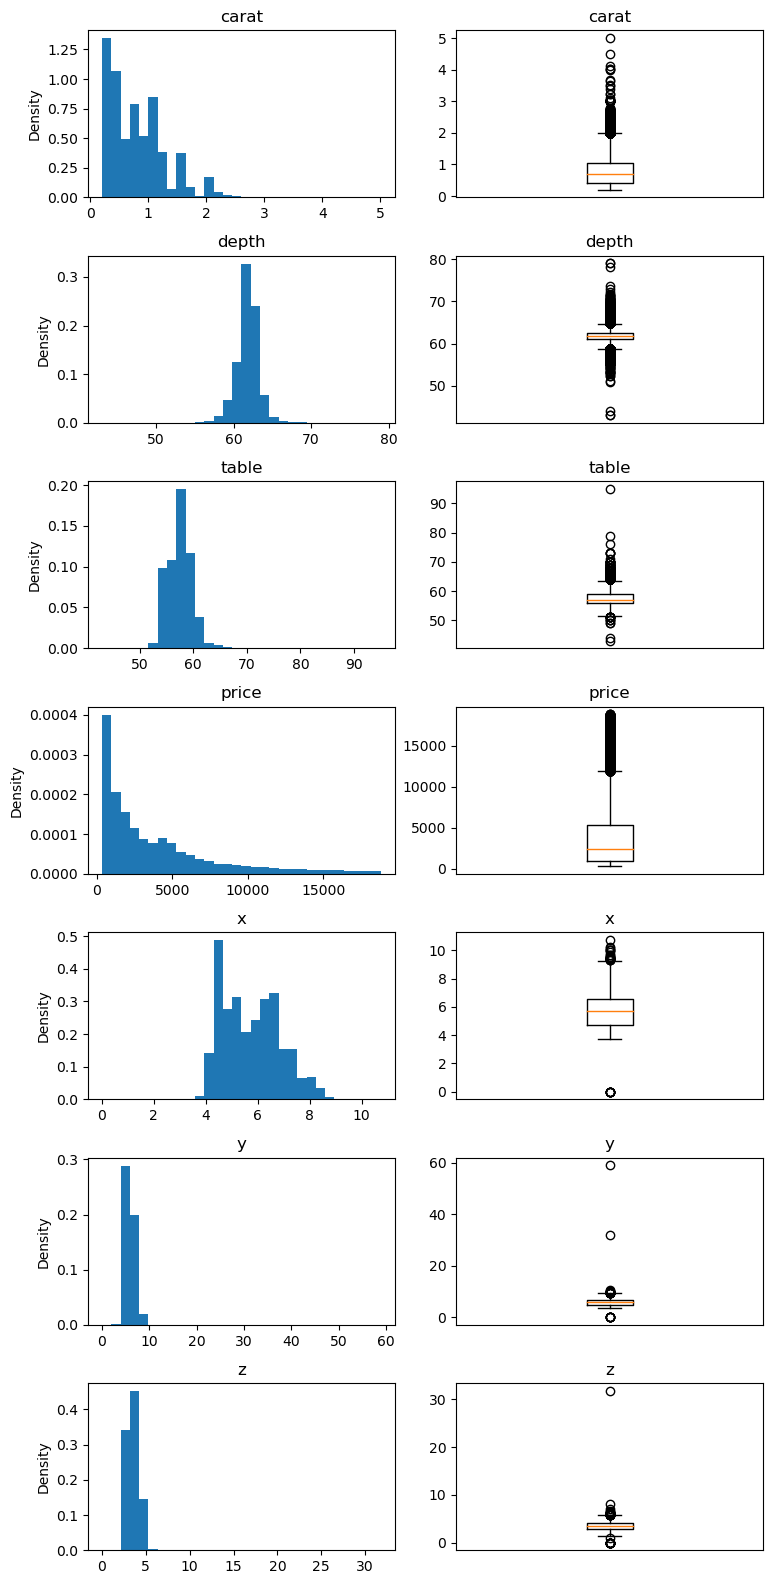

In [8]:
# Matplotlib method
num=['carat','depth','table','price','x','y','z']
site=1
plt.figure(figsize=(10,8))

for i in num:
    plt.subplot(7,2,site)
    #plt.figure(figsize=(8,4))
    #plt.subplot(121)
    plt.hist(df[i],bins=30,density=True)
    plt.title(f'{i}')
    plt.ylabel('Density')
    site+=1
    
    plt.subplot(7,2,site)
    plt.boxplot(df[i])
    plt.title(f'{i}')
    plt.xticks([]) 
    site+=1
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.8, 
                    top=2, 
                    wspace=0.2, 
                    hspace=0.35)

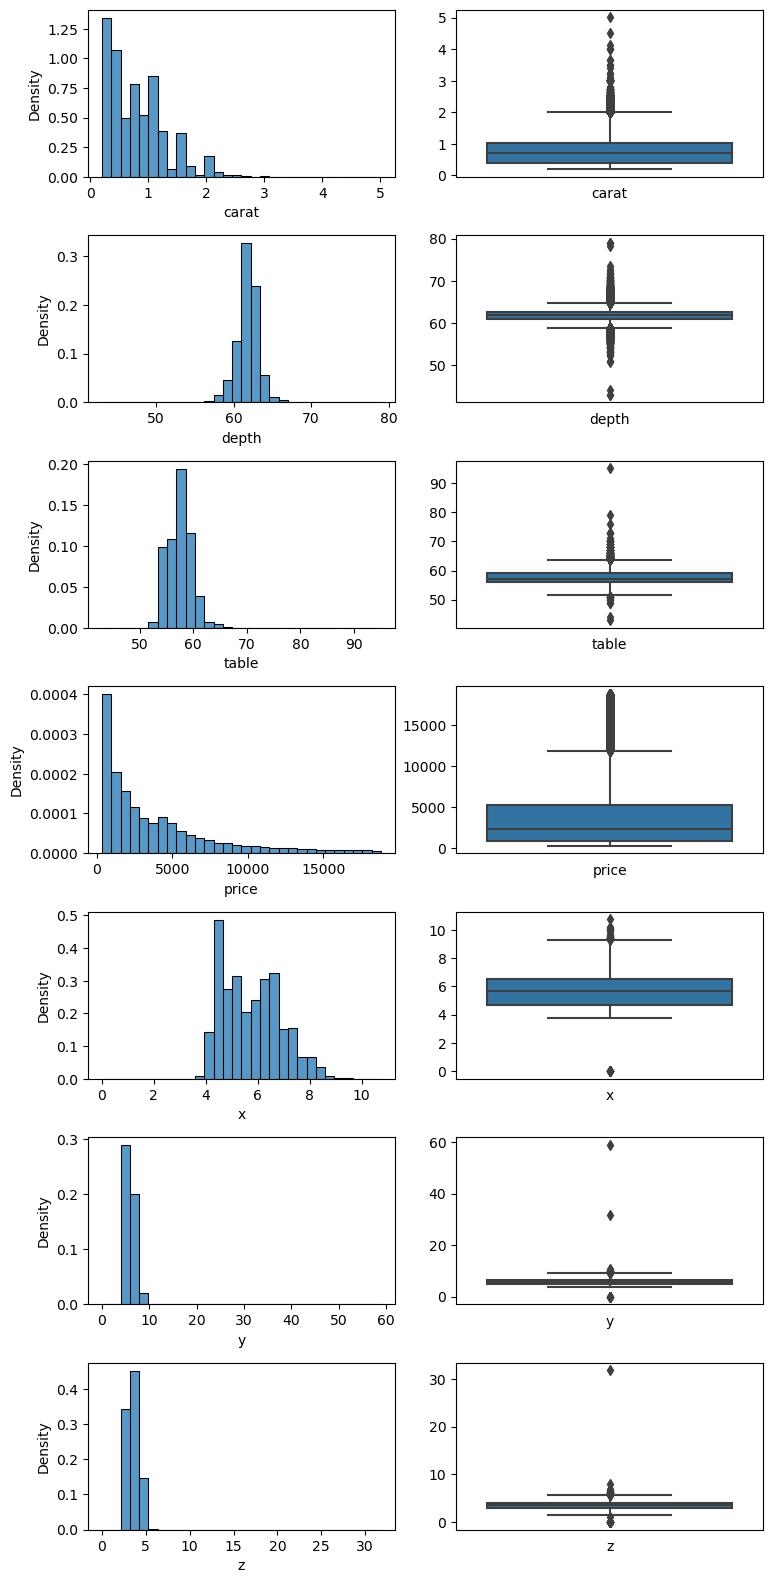

In [9]:
# Seaborn method
site=1
plt.figure(figsize=(10,8))
for i in num:
    plt.subplot(7,2,site)
    sns.histplot(df[i],bins=30,stat="density")
    site+=1
    
    plt.subplot(7,2,site)
    sns.boxplot(df[i])
    plt.xticks([])
    plt.xlabel(f'{i}')
    site+=1
    
plt.subplots_adjust(left=0.125,
                    bottom=0.1, 
                    right=0.8, 
                    top=2, 
                    wspace=0.2, 
                    hspace=0.35)    

__From the above statistical table and histogram figures, we can conclude the most diamonds have the following characteristics:__
* carat: less than 1 
* depth: between 60-64
* table: between 52-61
* price: less than 5000
* x: between 4-7.5
* y: less than 20
* z: less than 10

__We know the price varies a lot based on the histogram and the boxplot.__

__Generate a correlation matrix to verify if there are linear correlations between numerical variables__

Text(0.5, 1.0, 'Correlation Coefficient Of Numerical data')

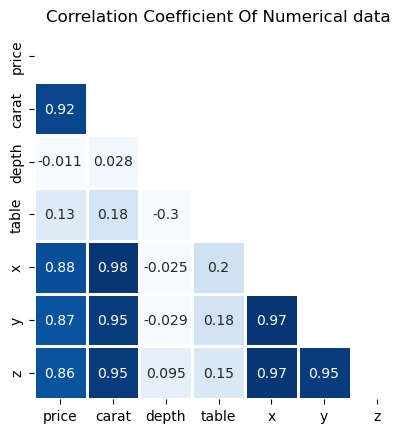

In [10]:
# Rearrange the order since I wanna focus on the relationship of other attributes with price
df_nu=df[num].reindex(columns=['price','carat','depth','table','x','y','z'])
cor_data=df_nu.corr()
mask = np.triu(np.ones_like(df_nu.corr(), dtype=bool))
ax=sns.heatmap(cor_data, cbar=0, linewidths=2,vmax=1, vmin=0, square=True, cmap='Blues',mask=mask,annot=True)
plt.title('Correlation Coefficient Of Numerical data')

__The above matrix demonstrated prices have a linear correlation with carat, x, y, and z. The carat has a linear correlation with the three dimensions x, y, and z. The three dimensions have a high correlation with each other. The depth has a mild correlation with the attribute table.__

__For categorical attributes, I generate a bar plot by two methods to see the number of diamonds in each category.__

In [7]:
# for categorical data, we count the number of each category
cat=['cut','color','clarity']
for i in cat:
    print('col:'+i)
    print(df[i].value_counts())
    print('-------------')

col:cut
Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64
-------------
col:color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64
-------------
col:clarity
SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64
-------------


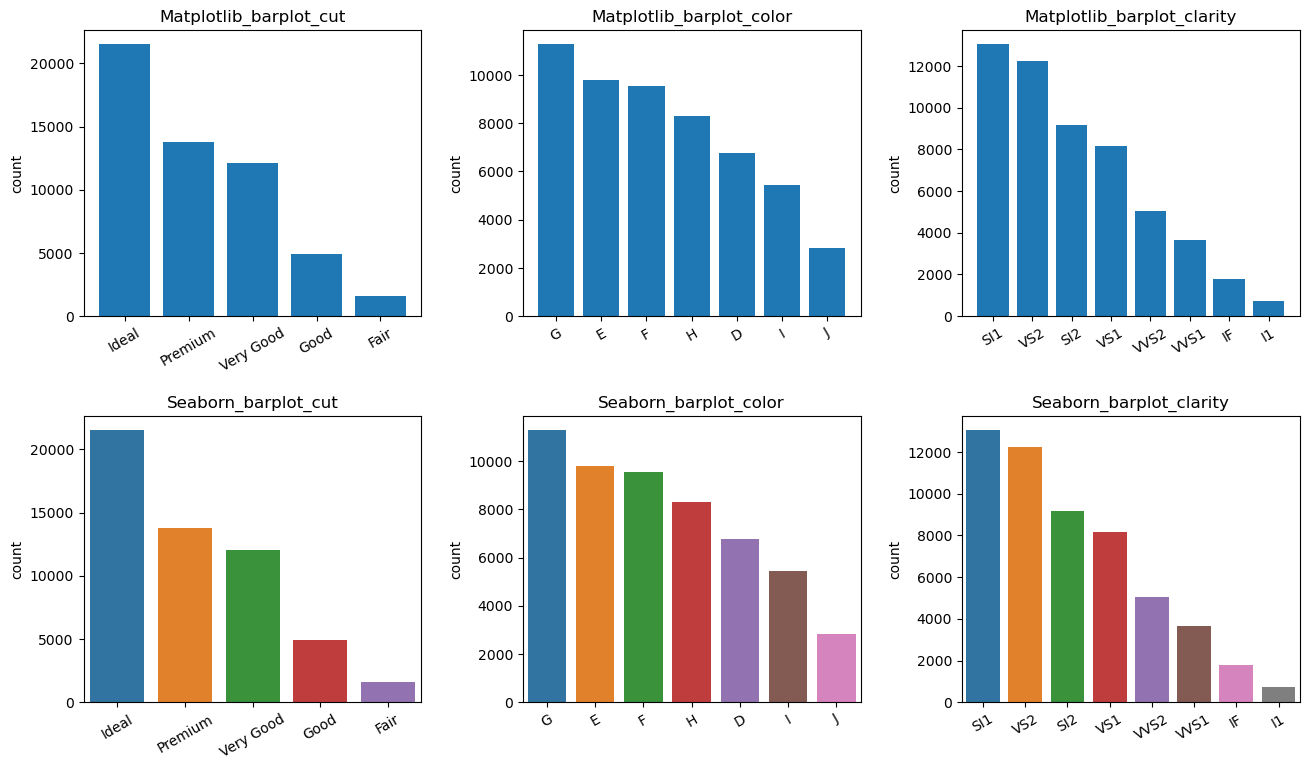

In [11]:
plt.figsize=(30,10)
for i in range(3):
    #----------------------Matplotlib method---------------------------#
    plt.subplot(2,3, i+1)
    data=df[cat[i]].value_counts().to_frame()
    plt.bar(x=data.index, height=data.iloc[:,0].tolist())
    plt.xticks(rotation=30)
    plt.title(f'Matplotlib_barplot_{cat[i]}')
    plt.ylabel('count')
    
    #----------------------Seaborn method-------------------------------#
    plt.subplot(2,3,4+i)
    sns.barplot(data=data, x=data.index, y=data.iloc[:,0].tolist())
    plt.xticks(rotation=30)
    plt.title(f'Seaborn_barplot_{cat[i]}')
    plt.ylabel('count')
    
    #-------------------------------------------------------------------#
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2.0, 
                    top=1.5, 
                    wspace=0.3, 
                    hspace=0.35)


__From the above figures, we know the following things:__
* __The most number of diamonds in cut, color, and clarity are Ideal, G, and SI1.__
* __The least number of diamonds in cut, color, and clarity are Fair, J, and I1.__ 

__The following bar plot demonstrates the relationship between these categorical variables with the price.__

__I utilized a 95% confidence interval as the error bar for the bar plot. In the Matplotlib method, we have to define the value of the confidence interval. Since the population variance is unknown, I utilized the T distribution to find the 95% confidence intervals for the population mean.__

<center><br> $\bar{X} \pm t_{\alpha/2} \frac{s}{\sqrt{n}}$ </center></br>

<center>$\bar{X}$: sample mean ; $s$: sample standard deviation ; $n$: sample size</center>

In [12]:
import scipy.stats
def find_interval(arr,CI):
    '''
    input: 
        arr: np.array, CI: decimal number (0.95 represent 95% confidence interval)
    output:
        the lower bound and the upper bound of confidence interval for mean value
    '''
    alpha=1-CI
    n=arr.size
    sample_mean=np.mean(arr)
    sample_std=np.std(arr)
    t_value=scipy.stats.t.ppf(1-alpha / 2, n-1)
    left=sample_mean-(t_value*sample_std/n**0.5)
    right=sample_mean+(t_value*sample_std/n**0.5)
    return ([left,right])


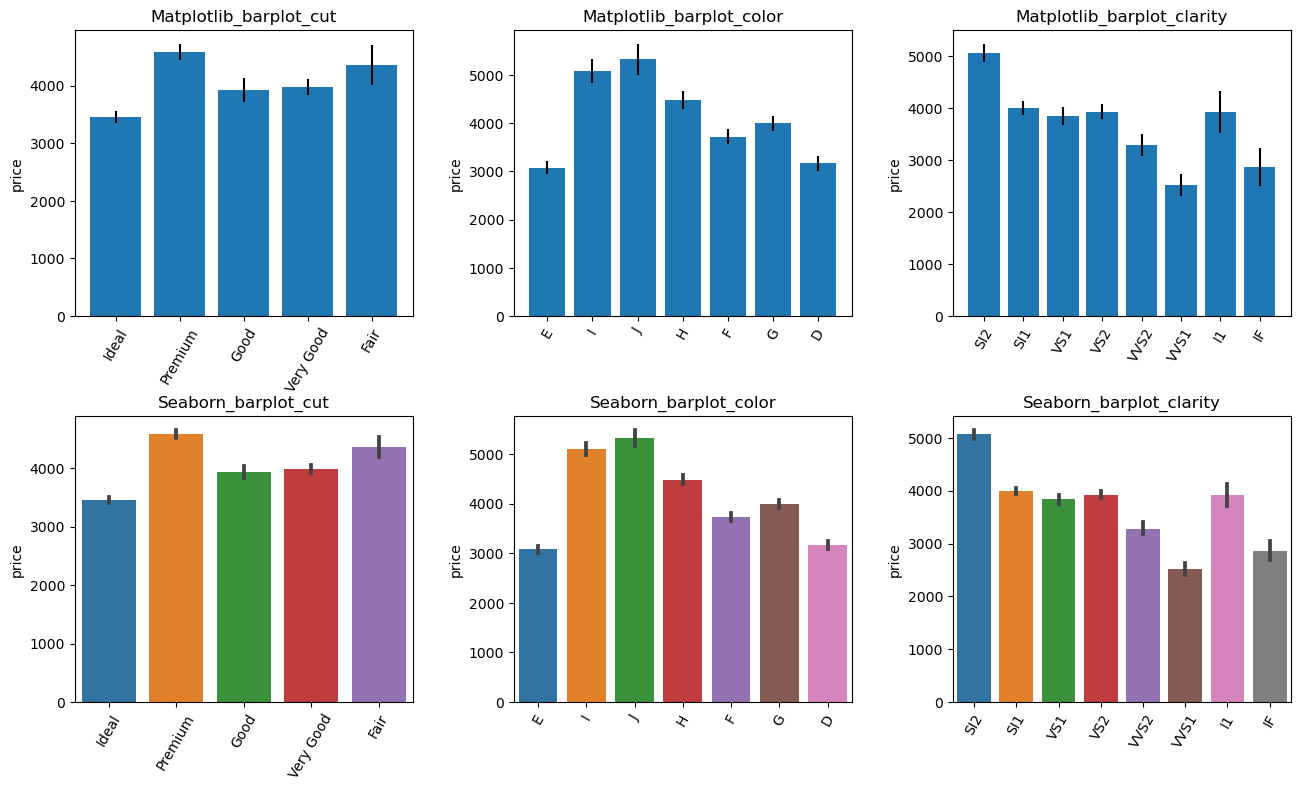

In [13]:
plt.figsize=(30,10)
for i in range(3):
    #----------------------Matplotlib method---------------------------#
    plt.subplot(2,3, i+1)
    x=df[cat[i]].unique()
    
    mean=[]
    error=[]
    for unique_val in x:
        data=df['price'][df[cat[i]]==unique_val].to_numpy()
        CI=find_interval(data,0.95) # return 95% CI for the mean value
        mean.append(np.mean(data))
        error.append(CI[1]-CI[0]) # error bar is the difference between upperbound and lowerbound of 95% CI
        #error.append(np.std(data)) # by substituting line 13, error bar becomes the standard deviation 
    #print(mean, std)
    
    plt.bar(x, mean,yerr=error)
    plt.xticks(rotation=60)
    plt.title(f'Matplotlib_barplot_{cat[i]}')
    plt.ylabel('price')
    
    #----------------------Seaborn method-------------------------------#
    plt.subplot(2,3,4+i)
    sns.barplot(data=df, x=df[cat[i]], y=df['price']) # the error bar is 95% confidence interval, passing ci="sd" can transfer to std
    plt.xticks(rotation=60)
    plt.title(f'Seaborn_barplot_{cat[i]}')
    plt.ylabel('price')
    plt.xlabel('')
    
    #-------------------------------------------------------------------#
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2.0, 
                    top=1.5, 
                    wspace=0.3, 
                    hspace=0.35)

__From the above bar plots, the mean prices are similar between the different quality of cut. The mean price of diamonds with the color I and J is higher than others. The mean price of clarity SI2 is the highest. Since the price is also affected by the carat and size, it is hard to conclude the relationship between price and these attributes.__  

__To know how the categorical variants affect price, we have to rule out the influence of weight and size on price. According to the correlation heatmap, we know the carat has a high linear correlation with dimensions, x, y, and z. And to our knowledge, we know the size of a diamond relates to its weight if the density is similar. Therefore, we utilized price per carat to remove the effect of weight and size on price. I generated the following bar plots to reveal how the price is affected by those categorical attributes.__

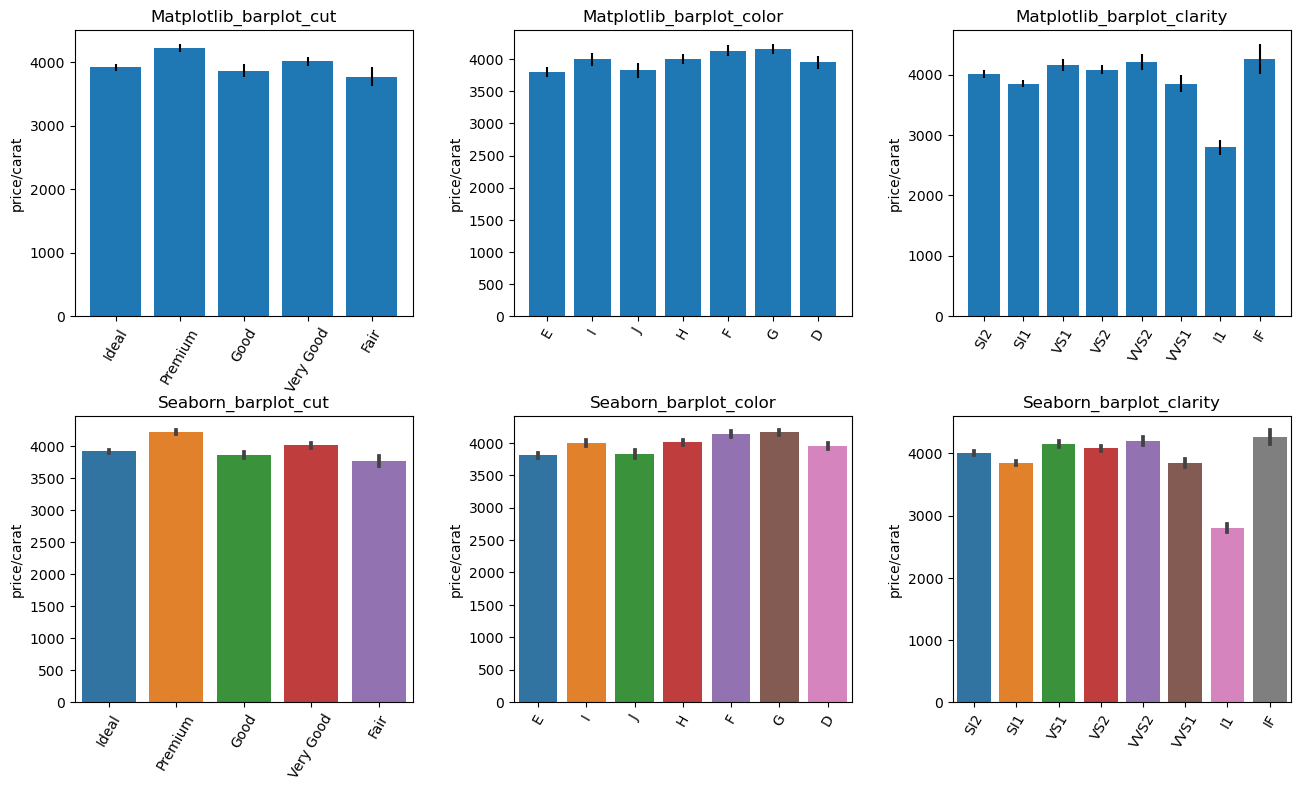

In [15]:
df["price/carat"]=df['price']/df['carat']
plt.figsize=(30,10)
for i in range(3):
    #----------------------Matplotlib method---------------------------#
    plt.subplot(2,3, i+1)
    x=df[cat[i]].unique()
    
    mean=[]
    error=[]
    for unique_val in x:
        data=df['price/carat'][df[cat[i]]==unique_val].to_numpy()
        CI=find_interval(data,0.95) # return 95% CI for the mean value
        mean.append(np.mean(data))
        error.append(CI[1]-CI[0]) # error bar is the difference between upperbound and lowerbound of 95% CI
        #error.append(np.std(data)) # by substituting line 14, error bar becomes the standard deviation 
    #print(mean, std)
    
    plt.bar(x, mean,yerr=error)
    plt.xticks(rotation=60)
    plt.title(f'Matplotlib_barplot_{cat[i]}')
    plt.ylabel('price/carat')
    
    #----------------------Seaborn method-------------------------------#
    plt.subplot(2,3,4+i)
    sns.barplot(data=df, x=df[cat[i]], y=df['price/carat']) # the error bar is 95% confidence interval, passing ci="sd" can transfer to std
    plt.xticks(rotation=60)
    plt.title(f'Seaborn_barplot_{cat[i]}')
    plt.ylabel('price/carat')
    plt.xlabel('')
    
    #-------------------------------------------------------------------#
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=2.0, 
                    top=1.5, 
                    wspace=0.3, 
                    hspace=0.35)
df=df.drop(columns='price/carat')

__After removing the effect of weight and dimensions on price, the bar plot demonstrated price per carat did not vary between the different quality of cut and color. However, we can see the price per carat of diamonds that have the worst clarity, I1, decreased severely.__ 

## Part 3: Inferences (40 Points total)

### 1. What proportion of diamonds are between .30 and 1.08 carats?
By using the criteria, we can generate a filter to select the data we want. The code df.shape[0] returns the number of rows. The proportion was calculated by the number of rows in selected data divided by the number of rows in the whole data set. 

In [17]:
filt=(df['carat']>=0.3)&(df['carat']<=1.08)
res=round(df[filt].shape[0]/df.shape[0],4) 
print(f'The proportion is {res*100}%')

The proportion is 74.68%


### 2. How many of the diamonds have equal x and y dimensions?
Generate a filter that met the requirement and use the code df.shape[0] to know the number of diamonds.

In [18]:
filt=df['x']==df['y']
res=df[filt].shape[0]
print(f'There have {res} diamonds that have equal x and y dimensions')

There have 17 diamonds that have equal x and y dimensions


### 3. How many of the diamonds have a carat value that is less than the mean carat value?
Use the df.mean() to calculate the mean value of the carat and use the value as a criterion to select data.

In [19]:
filt=df['carat']<=df['carat'].mean()
res=df[filt].shape[0]
print(f'There have {res} diamonds which is less than the mean carat value')

There have 31127 diamonds which is less than the mean carat value


### 4. How many diamonds have a Premium cut or better? Note that the possible values for the quality of a cut are ranked in ascending order as follows: Fair / Good / Very Good / Premium / Ideal
Select the diamonds that have the quality of Premium and Ideal cut

In [20]:
filt=(df['cut']=='Premium')|(df['cut']=='Ideal')
res=df[filt].shape[0]
print(f'There have {res} diamonds that a premium cut or better')

There have 35342 diamonds that a premium cut or better


### 5. Which diamond has the highest price per carat? What is its value?
Calculate the price per carat by dividing the price by carat. Utilize df.max() to find the highest value in price/carat column and showed the all attributes of that diamond.

In [21]:
df["price/carat"]=df['price']/df['carat']
filt=df["price/carat"]==df["price/carat"].max()
print('The diamond with the following attributes has the highest price per carat')
print()
print(df[filt].iloc[:,:-1])
print('---------------------------------------------------------------------------')
print('The highest price per carat is',round(df['price/carat'][filt].values[0],3))

The diamond with the following attributes has the highest price per carat

       carat        cut color clarity  depth  table  price     x     y     z
27635   1.04  Very Good     D      IF   61.3   56.0  18542  6.53  6.55  4.01
---------------------------------------------------------------------------
The highest price per carat is 17828.846


### 6. Using both Matplolib and Seaborn, make boxplots of the diamond price for each distinct cut value and discuss any conclusions you can draw from the appearance of the boxplots.

In matplotlib method, I utilized df.unique() function to store all the categories in a list, and I extracted the price value from the whole dataset for each category in cut column. Then, stored the price data in a list.

In [22]:
data=[] # store the price in each cut category with the order of cut_level
cut_level=df['cut'].unique()
for i in cut_level:
    data.append(df['price'][df['cut']==i].tolist())

Text(0, 0.5, 'Price')

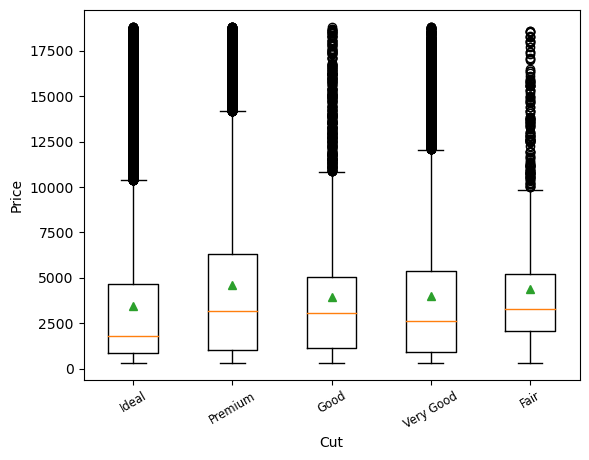

In [23]:
# Matplolib
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.boxplot(data,showmeans=True)
labels = ax.set_xticklabels(cut_level,rotation=30, fontsize='small')
ax.set_xlabel('Cut')
ax.set_ylabel('Price')

<AxesSubplot:xlabel='cut', ylabel='price'>

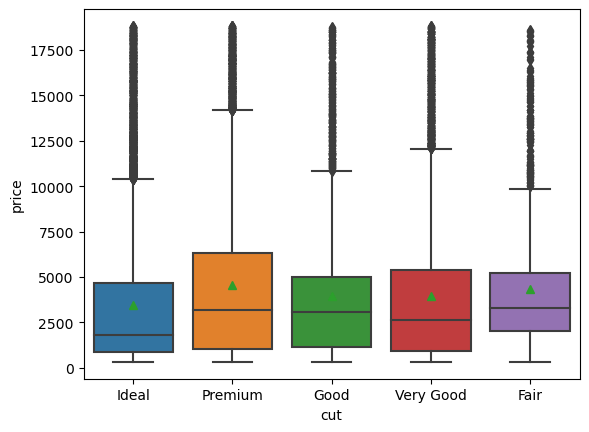

In [24]:
# Seaborn
sns.boxplot(data=df, x=df['cut'], y=df['price'],showmeans=True)

__Conclusion: From the above figures, the mean price of the premium is the highest. The price distribution of premium is more discrete than others.__

### 7. Using both Matplolib and Seaborn, make a scatter plot of price vs. carat. What can we say about the relationship between those two attributes?

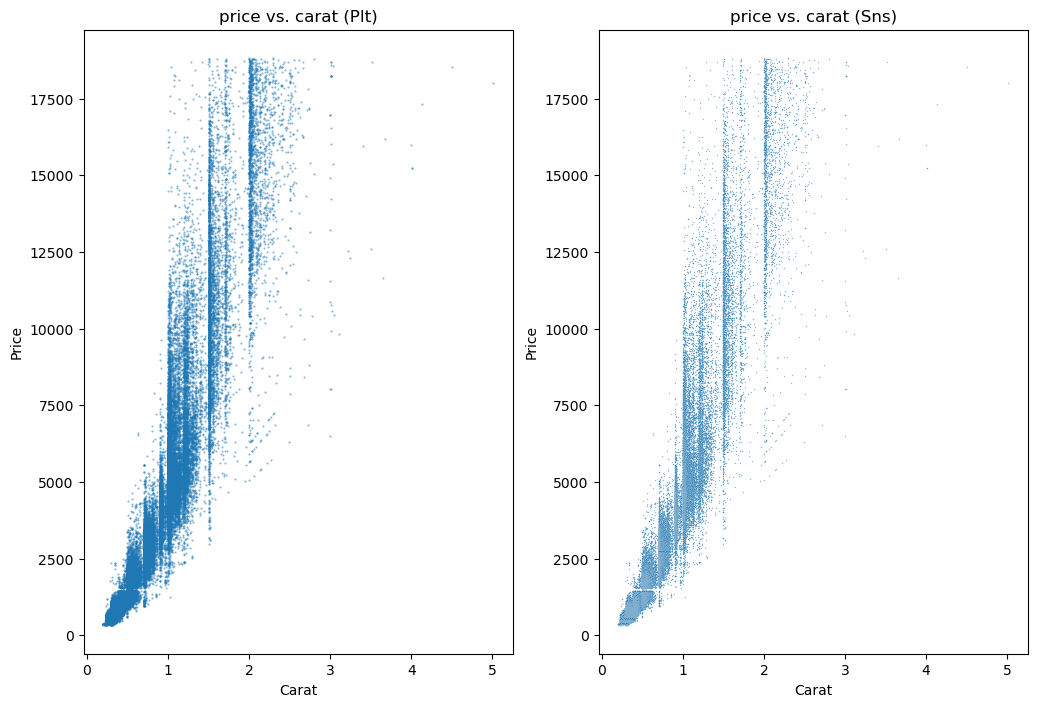

In [25]:
plt.figsize=(8,6)
#---------------------------------------------------------------------
# Matplolib
plt.subplot(1,2,1)
plt.scatter(x=df['carat'],y=df['price'],alpha=0.5,s=0.3)
plt.title('price vs. carat (Plt)')
plt.xlabel('Carat')
plt.ylabel('Price')
#---------------------------------------------------------------------
# Seaborn 
plt.subplot(1,2,2)
sns.scatterplot(data=df,x='carat',y='price',alpha=0.5,s=1)
plt.title('price vs. carat (Sns)')
plt.xlabel('Carat')
plt.ylabel('Price')
#---------------------------------------------------------------------
# adjust the figure
plt.subplots_adjust(left=0.125,
                    bottom=0.2, 
                    right=1.6, 
                    top=1.5, 
                    wspace=0.2, 
                    hspace=0.2)

__Conclusions:__
* __When diamonds become heavier, the more expensive the diamond is.__
* __The price of diamonds is not just affected by the weight since we can see the prices are diverse even though the diamonds have the same weight.__
*  __When the weight becomes heavier, the price has a broader range. That is to say, other attributes take more important roles in price decisions when the carat is large.__

## Part 4: Conclusion (10 Points)

__The prices of diamonds fluctuate even more severely when the carat is getting large, and the price is affected by multiple attributes. We know the carat and the dimension x, y, and z have a high positive correlation with price. However, it is hard to see the trend in the price of the ordinal categorical attributes, cut, color, and clarity, simply based on price since it is also affected by weight and size. To know how the three categorical attributes work on price, we utilized price per carat to analyze. The result showed that the worst clarity made the price per carat fall a lot, nonetheless, the price per carat did not vary between other clarity, different quality of cut, and different colors.__  

## References (5 Points)

* Marker size adjustment:
https://stackoverflow.com/questions/14827650/pyplot-scatter-plot-marker-size
* Reorder the columns:
https://datagy.io/reorder-pandas-columns/
* Bar plot in Matplotlib (add error bar):
https://pythonforundergradengineers.com/bar-plot-with-error-bars-jupyter-matplotlib.html
* Seaborn barplot error bar:
https://www.python-graph-gallery.com/error-bars-on-barplot
* Latex basic code:
http://www.malinc.se/math/latex/basiccodeen.php
* Confidence interval calculation:
https://www.youtube.com/watch?v=bzQP-e1FYiA&ab_channel=LearnSomething